# Завантаження і ознайомлення з даними

In [289]:
import warnings
warnings.filterwarnings("ignore")

In [290]:
import pandas as pd

country = "United States"

#(GDP growth (annual %)), (GDP (current US$)), (GDP per capita (current US$)), (Inflation (annual %)),
#(Unemployment, total (% of total labor force)), (Central government debt, total (current LCU)), (Population, total)
#(Birth rate, crude (per 1,000 people)), (Death rate, crude (per 1,000 people)), (Foreign direct investment, (US$))

Years = 7

predict = "GDP (current US$)"

df = pd.read_excel("Dataset_1_filled1.xlsx")
# print(df["Country Name"].unique())
df = df[df["Country Name"] == country]
df.head()


,Time,Time Code,Country Name,Country Code,GDP growth (annual %),GDP (current US$),GDP per capita (current US$),Inflation (annual %),"Unemployment, total (% of total labor force)","Central government debt, total (current LCU)","Population, total","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Foreign direct investment, (US$)"
206,1960,YR1960,United States,USA,NaN,5.419886e+11,2999.864872,1.457976,5.5,NaN,180671000.0,23.7,9.5,NaN
423,1961,YR1961,United States,USA,3.681207,5.619403e+11,3059.160821,1.070724,6.7,NaN,183691000.0,23.3,9.3,NaN
640,1962,YR1962,United States,USA,7.420557,6.036394e+11,3236.013112,1.198773,5.5,NaN,186538000.0,22.4,9.5,NaN
857,1963,YR1963,United States,USA,5.536275,6.370586e+11,3366.369790,1.239669,5.7,NaN,189242000.0,21.7,9.6,NaN
1074,1964,YR1964,United States,USA,7.391168,6.841446e+11,3565.314430,1.278912,5.2,NaN,191889000.0,21.1,9.4,NaN


## Завантаження і ознайомлення з даними

На початку я завантажую дані з файлу `Dataset_1_filled.xlsx` і фільтрую їх за країною, яку вибрав. У цьому випадку, країна вибрана зі змінної `country`, яка містить значення "United States". 

Дані містять наступні показники:
- Зростання ВВП (річний %)
- ВВП (поточний долар США)
- ВВП на душу населення (поточний долар США)
- Інфляція (річний %)
- Безробіття, загальне (% від загальної робочої сили)
- Державний борг центрального уряду (поточна національна валюта)
- Населення, загальне
- Народжуваність, груба (на 1 000 осіб)
- Смертність, груба (на 1 000 осіб)
- Прямі іноземні інвестиції (долар США)

Ми будемо робити прогноз на період, який визначається змінною `Years`, що дорівнює 7 рокам. Прогнозоване значення визначається змінною `predict`, яка містить значення "GDP (current US$)".

### Опис даних

Дані містять наступні колонки:
- `Time`: рік
- `GDP growth (annual %)`: зростання ВВП (річний %)
- `GDP (current US$)`: ВВП (поточний долар США)
- `GDP per capita (current US$)`: ВВП на душу населення (поточний долар США)
- `Inflation (annual %)`: інфляція (річний %)
- `Unemployment, total (% of total labor force)`: безробіття, загальне (% від загальної робочої сили)
- `Central government debt, total (current LCU)`: Державний борг центрального уряду (поточна національна валюта)
- `Population, total`: населення, загальне
- `Birth rate, crude (per 1,000 people)`: народжуваність, груба (на 1 000 осіб)
- `Death rate, crude (per 1,000 people)`: смертність, груба (на 1 000 осіб)
- `Foreign direct investment, (US$)`: прямі іноземні інвестиції (долар США)
```
```

In [291]:
print("size dataset", df.shape, "\n")
df.info()

size dataset (64, 14) 

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 206 to 13877
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Time                                          64 non-null     int64  
 1   Time Code                                     64 non-null     object 
 2   Country Name                                  64 non-null     object 
 3   Country Code                                  64 non-null     object 
 4   GDP growth (annual %)                         63 non-null     float64
 5   GDP (current US$)                             64 non-null     float64
 6   GDP per capita (current US$)                  64 non-null     float64
 7   Inflation (annual %)                          64 non-null     float64
 8   Unemployment, total (% of total labor force)  64 non-null     float64
 9   Central government debt, total (current LCU

In [292]:
df.isnull().sum()

Time                                             0
Time Code                                        0
Country Name                                     0
Country Code                                     0
GDP growth (annual %)                            1
GDP (current US$)                                0
GDP per capita (current US$)                     0
Inflation (annual %)                             0
Unemployment, total (% of total labor force)     0
Central government debt, total (current LCU)    29
Population, total                                0
Birth rate, crude (per 1,000 people)             0
Death rate, crude (per 1,000 people)             0
Foreign direct investment, (US$)                10
dtype: int64

In [293]:
df.describe()

,Time,GDP growth (annual %),GDP (current US$),GDP per capita (current US$),Inflation (annual %),"Unemployment, total (% of total labor force)","Central government debt, total (current LCU)","Population, total","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Foreign direct investment, (US$)"
count,64.000000,63.000000,6.400000e+01,64.000000,64.000000,64.000000,3.500000e+01,6.400000e+01,64.000000,64.000000,5.400000e+01
mean,1991.500000,6.486337,8.548232e+12,29136.216664,3.770332,5.917125,1.128480e+13,2.587349e+08,15.239062,8.827156,2.659037e+09
std,18.618987,2.998499,7.453659e+12,22026.012318,2.762789,1.615085,8.752655e+12,4.758392e+07,2.860604,0.560077,9.796567e+10
min,1960.000000,-1.975611,5.419886e+11,2999.864872,-0.355546,3.500000,2.207460e+12,1.806710e+08,10.900000,7.900000,-3.454350e+11
25%,1975.750000,4.300915,1.826285e+12,8394.554319,1.876588,4.834500,3.680520e+12,2.175195e+08,14.000000,8.500000,-1.924650e+10
50%,1991.500000,6.017603,6.339228e+12,24880.624841,3.021948,5.600000,7.663073e+12,2.547475e+08,14.800000,8.700000,5.060000e+09
75%,2007.250000,8.486080,1.447519e+13,47408.769420,4.399866,7.025000,1.718139e+13,3.019469e+08,15.925000,9.300000,3.368000e+10
max,2023.000000,12.958480,2.772071e+13,82769.412211,13.549202,9.700000,3.184476e+13,3.349149e+08,23.700000,10.400000,1.772770e+11


## Підготовка даних

### Видалення непотрібних колонок

In [294]:
df.drop(columns=['Time Code', 'Country Code', 'Central government debt, total (current LCU)', 'Country Name'], inplace=True)
df

,Time,GDP growth (annual %),GDP (current US$),GDP per capita (current US$),Inflation (annual %),"Unemployment, total (% of total labor force)","Population, total","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Foreign direct investment, (US$)"
206,1960,NaN,5.419886e+11,2999.864872,1.457976,5.500,180671000.0,23.7,9.500,NaN
423,1961,3.681207,5.619403e+11,3059.160821,1.070724,6.700,183691000.0,23.3,9.300,NaN
640,1962,7.420557,6.036394e+11,3236.013112,1.198773,5.500,186538000.0,22.4,9.500,NaN
857,1963,5.536275,6.370586e+11,3366.369790,1.239669,5.700,189242000.0,21.7,9.600,NaN
1074,1964,7.391168,6.841446e+11,3565.314430,1.278912,5.200,191889000.0,21.1,9.400,NaN
...,...,...,...,...,...,...,...,...,...,...
13009,2019,4.276936,2.153998e+13,65604.681520,1.812210,3.669,328329953.0,11.4,8.697,-2.010570e+11
13226,2020,-0.862939,2.135410e+13,64411.373178,1.233584,8.055,331526933.0,10.9,10.270,1.452650e+11
13443,2021,10.897511,2.368117e+13,71318.307359,4.697859,5.349,332048977.0,11.0,10.400,-1.338510e+11
13660,2022,9.820975,2.600689e+13,78035.175360,8.002800,3.650,333271411.0,11.0,9.800,-2.047200e+10


### Застосував регресійну імпутацію

In [295]:
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Визначення регресійної моделі
regression_model = HistGradientBoostingRegressor()

# Застосування регресійної імпутації
for column in df.columns:
    if df[column].isnull().sum() > 0:
        # Розділення датасету на набори з відомими і невідомими значеннями
        X_train = df[df[column].notnull()].drop(column, axis=1)
        y_train = df[df[column].notnull()][column]
        X_test = df[df[column].isnull()].drop(column, axis=1)

        # Тренування регресійної моделі та передбачення пропущених значень
        regression_model.fit(X_train, y_train)
        predicted_values = regression_model.predict(X_test)

        # Заповнення пропущених значень у датасеті
        df.loc[df[column].isnull(), column] = predicted_values

In [296]:
df.head(10)

,Time,GDP growth (annual %),GDP (current US$),GDP per capita (current US$),Inflation (annual %),"Unemployment, total (% of total labor force)","Population, total","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Foreign direct investment, (US$)"
206,1960,6.680147,5.419886e+11,2999.864872,1.457976,5.5,180671000.0,23.7,9.5,-2.519373e+10
423,1961,3.681207,5.619403e+11,3059.160821,1.070724,6.7,183691000.0,23.3,9.3,4.840698e+10
640,1962,7.420557,6.036394e+11,3236.013112,1.198773,5.5,186538000.0,22.4,9.5,-2.519373e+10
857,1963,5.536275,6.370586e+11,3366.369790,1.239669,5.7,189242000.0,21.7,9.6,3.104098e+10
1074,1964,7.391168,6.841446e+11,3565.314430,1.278912,5.2,191889000.0,21.1,9.4,-5.741465e+10
1291,1965,8.442695,7.419049e+11,3818.288251,1.585169,4.5,194303000.0,19.4,9.4,-5.741465e+10
1508,1966,9.587199,8.130328e+11,4136.308296,3.015075,3.8,196560000.0,18.4,9.5,-5.741465e+10
1725,1967,5.730061,8.596200e+11,4325.959351,2.772786,3.8,198712000.0,17.8,9.4,-5.741465e+10
1942,1968,9.376813,9.402250e+11,4684.588403,4.271796,3.6,200706000.0,17.6,9.8,-6.718962e+10
2159,1969,8.212202,1.017438e+12,5019.998186,5.462386,3.5,202677000.0,17.9,9.5,-6.718962e+10


# Візуалізація

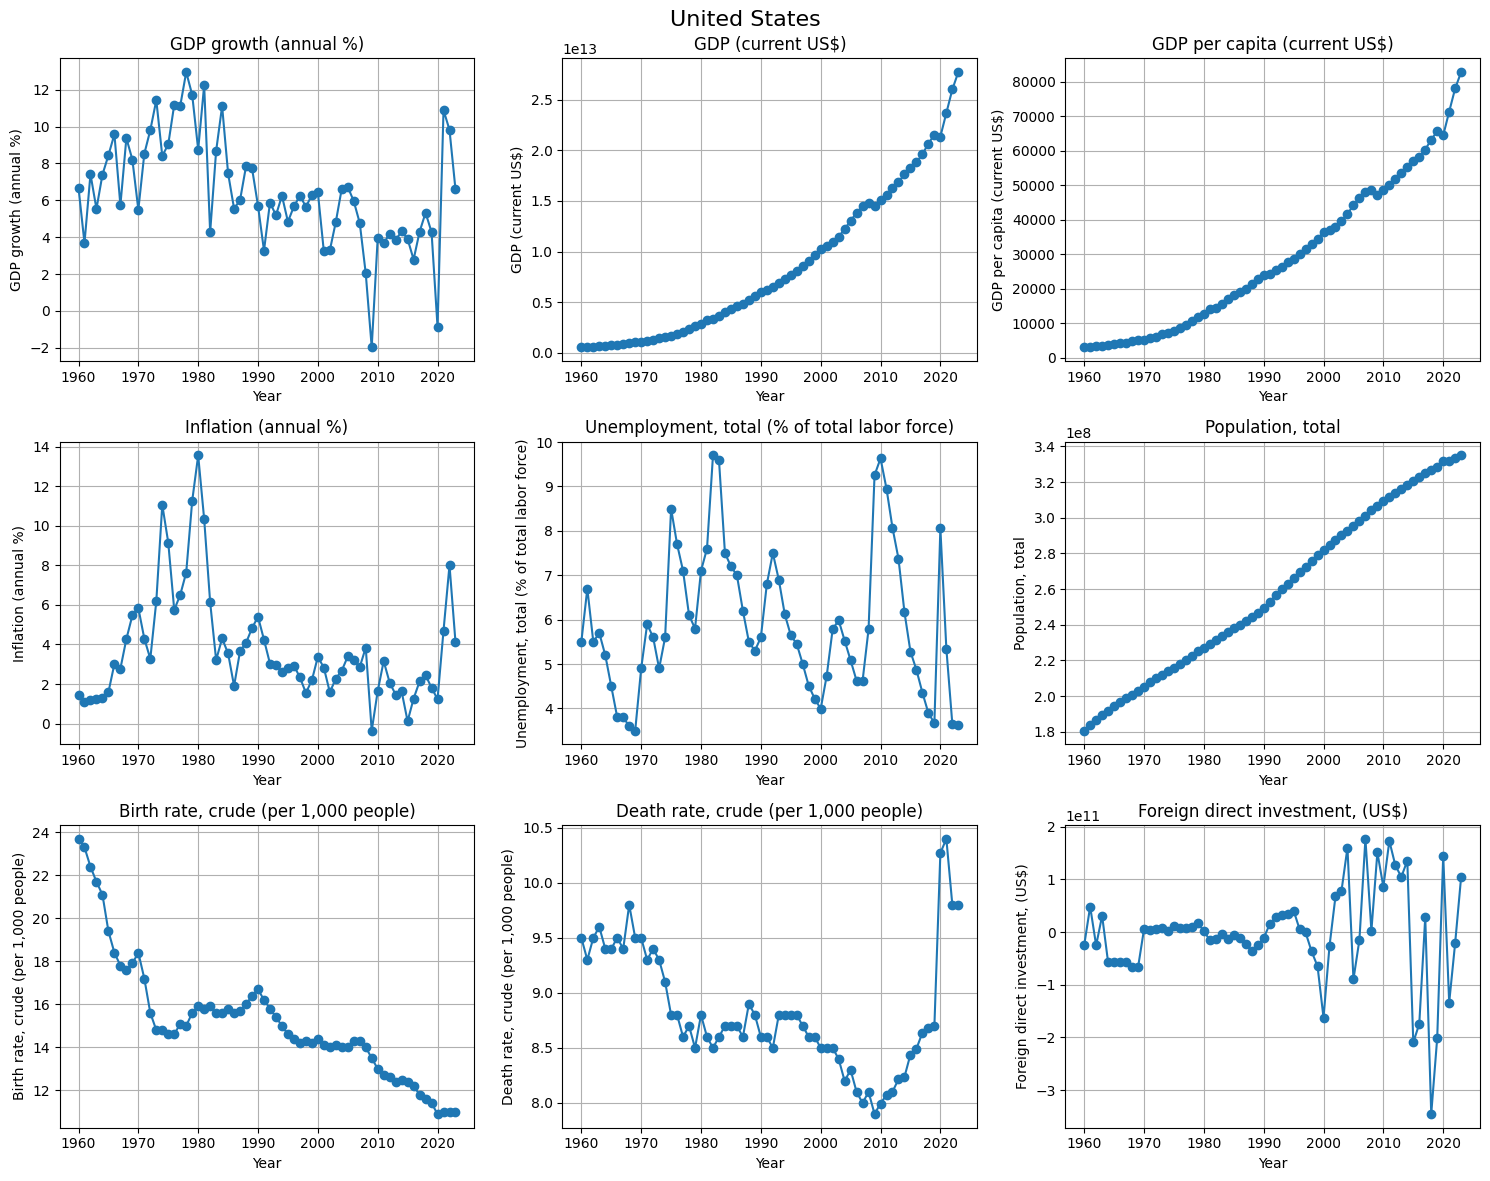

In [297]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle(country, fontsize=16)


for ax, metric in zip(axes.flatten(), df.columns[1:]):
    if metric in df.columns:
        ax.plot(df['Time'], df[metric], marker='o', linestyle='-')
        ax.set_title(metric)
        ax.set_xlabel("Year")
        ax.set_ylabel(metric)
        ax.grid(True)

plt.tight_layout()
plt.show()

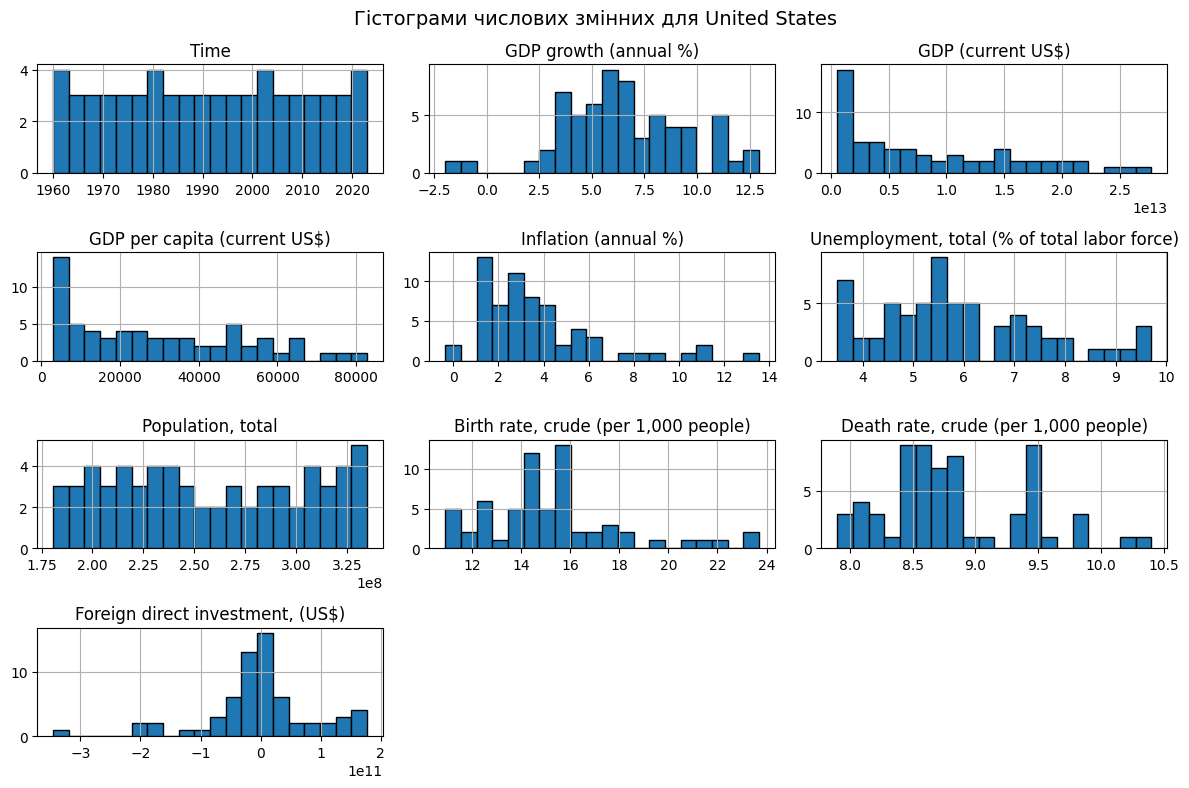

In [298]:
#Графік числових зміних
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle(f"Гістограми числових змінних для {country}", fontsize=14)
plt.tight_layout()
plt.show()

In [299]:
import numpy as np
df["Time"] = pd.to_datetime(df["Time"], format='%Y')
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: np.log(x + 1))

<Axes: >

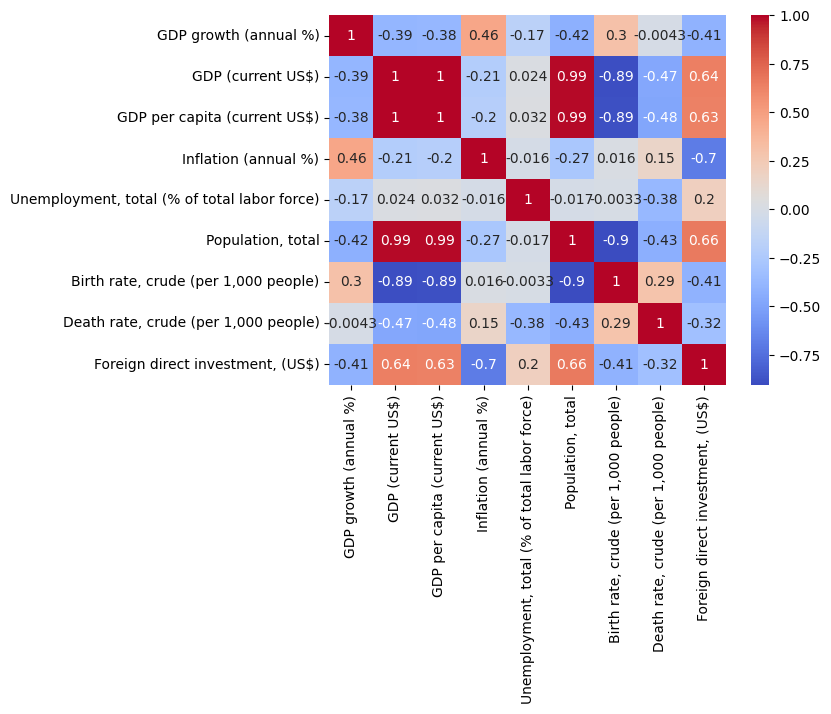

In [300]:
import seaborn as sns
df_corr = df.select_dtypes(include=['number'])
correlation_matrix = df_corr.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Підговка до машиного навчання

In [301]:
#Видалення ознак, які мають високу кореляцію
df.drop(columns=['GDP per capita (current US$)', 'Population, total'], inplace=True)

## Arima model

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
country_df = df[['Time', predict]]

model_params_best = {
    "p": [],
    "d": [],
    "q": [],
    "mse": [],
    "rmse": [],
    "mae": [],
    }

# Перетворення стовпця Time у формат дати
country_df["Time"] = pd.to_datetime(country_df["Time"], format='%Y')
country_df.set_index("Time", inplace=True)

train_size = int(len(country_df) * 0.8)
train, test = country_df[:train_size], country_df[train_size:]

for p in range(1, 4):
    for d in range(1, 7):
        for q in range(1, 7):
            model = ARIMA(train, order=(p, d, q))
            result = model.fit()
            y_true = test[predict]
            y_pred = result.forecast(steps=len(test))
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_true, y_pred)

            model_params_best['mse'].append(mse)
            model_params_best['rmse'].append(rmse)
            model_params_best['mae'].append(mae)
            model_params_best["p"].append(p)
            model_params_best["d"].append(d)
            model_params_best["q"].append(q)

In [303]:
model_params_best = pd.DataFrame(model_params_best)
model_params_best.sort_values(by='rmse', ascending=True, inplace=True)
model_params_best.head()

,p,d,q,mse,rmse,mae
27,1,5,4,0.001611,0.040136,0.032211
20,1,4,3,0.002033,0.045090,0.036305
64,2,5,5,0.002297,0.047929,0.038003
54,2,4,1,0.003410,0.058397,0.053583
7,1,2,2,0.010898,0.104395,0.080213


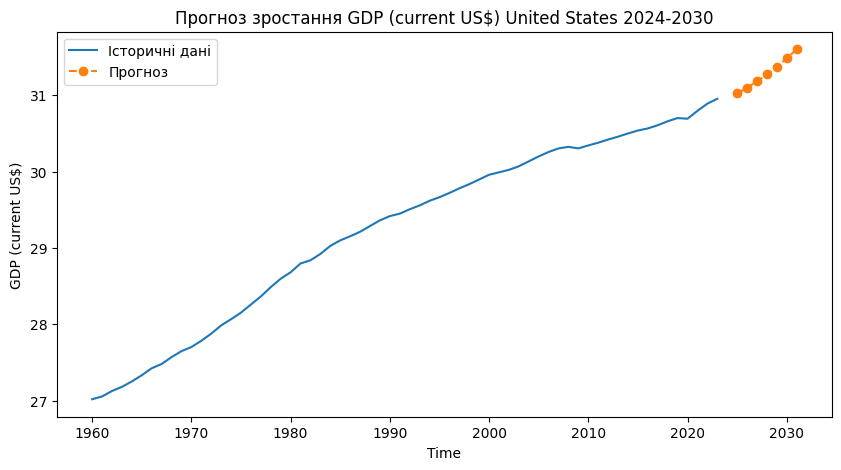

            Year  Predicted GDP (current US$)
2024-01-01  2024                    31.022910
2025-01-01  2025                    31.098122
2026-01-01  2026                    31.181032
2027-01-01  2027                    31.271411
2028-01-01  2028                    31.371439
2029-01-01  2029                    31.481040
2030-01-01  2030                    31.602391


In [304]:
model = ARIMA(country_df[predict] , order=(model_params_best['p'].iloc[0], model_params_best['d'].iloc[0], model_params_best['q'].iloc[0]))
result = model.fit()

# Прогноз на майбутні роки
future_years = pd.date_range(start="2024", periods=Years, freq='YE')
forecast = result.forecast(steps=Years)


# Вивід результатів
forecast_df = pd.DataFrame({"Year": future_years.year, f"Predicted {predict}": forecast})

# Візуалізація
plt.figure(figsize=(10,5))
plt.plot(country_df.index, country_df[predict] , label='Історичні дані')
plt.plot(future_years, forecast, marker='o', linestyle='dashed', label='Прогноз')
plt.xlabel('Time')
plt.ylabel(predict)
plt.legend()
plt.title(f"Прогноз зростання {predict} {country} 2024-{2023+Years}")
plt.show()
print(forecast_df)

## NaiveForecaster

MAE: 0.061655330289839175
RMSE: 0.06966105879071612


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP (current US$)'>)

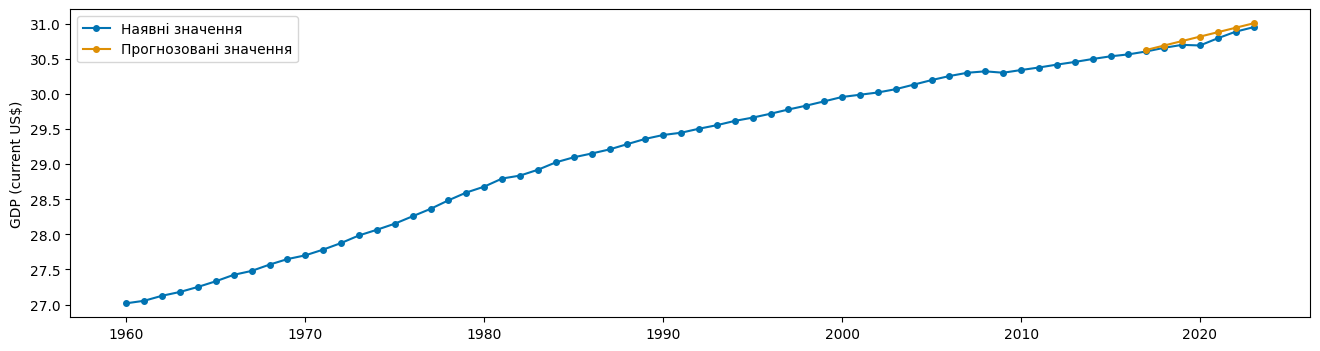

In [305]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split


fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2024", periods=Years, freq="YE")), is_relative=False
)

y = df[["Time", predict]].copy()
y["Time"] = pd.to_datetime(y["Time"], format='%Y')
y.set_index("Time", inplace=True)
y.index = pd.PeriodIndex(y.index, freq='A-DEC')  # Призначаємо частоту 'A-DEC' для кінця року
# y = y[[predict]]

y_train, y_test = temporal_train_test_split(y, test_size=0.1)

forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=np.arange(1, len(y_test) + 1))



# mae = mean_absolute_error(y_train, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

plot_series(y, y_pred, labels=["Наявні значення", "Прогнозовані значення"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP (current US$)'>)

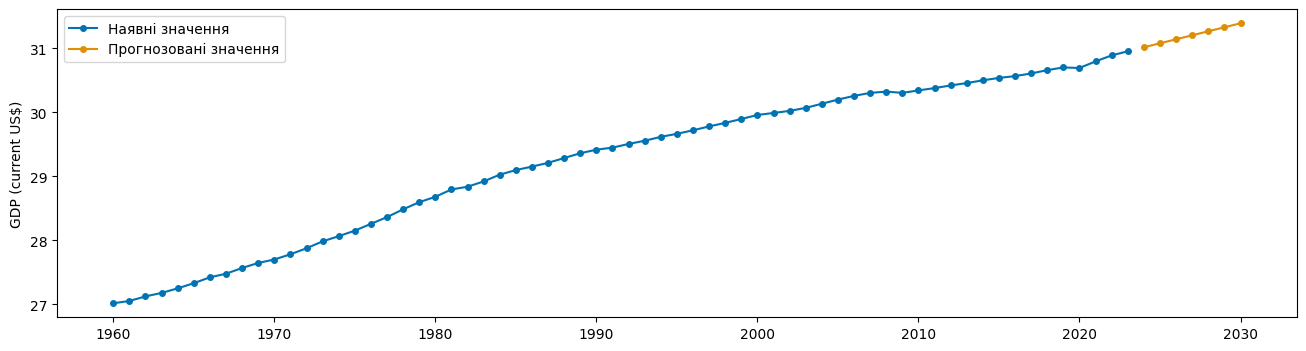

In [306]:
forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(y)
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["Наявні значення", "Прогнозовані значення"])

## BATS

MAE: 0.05066763950313913
RMSE: 0.06810323851592422


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP (current US$)'>)

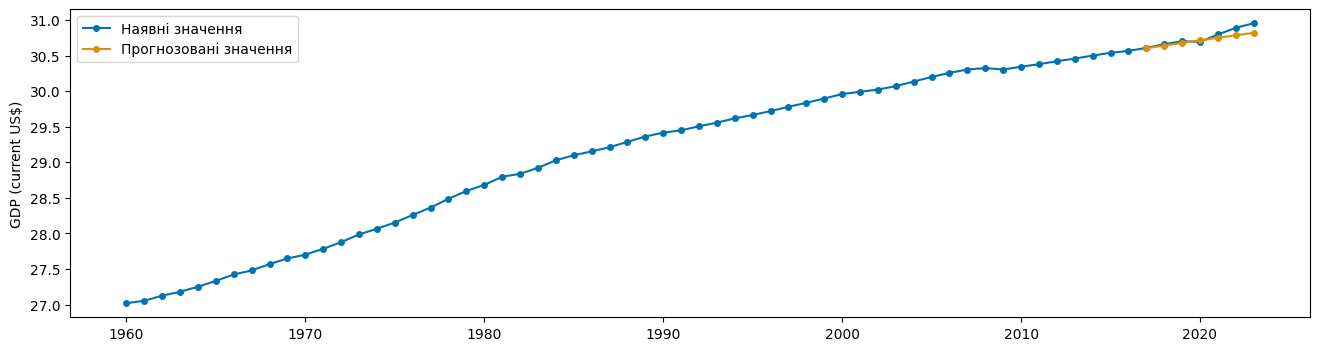

In [307]:
from sktime.forecasting.bats import BATS


forecaster = BATS(use_trend=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=np.arange(1, len(y_test) + 1))

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


plot_series(y, y_pred, labels=["Наявні значення", "Прогнозовані значення"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP (current US$)'>)

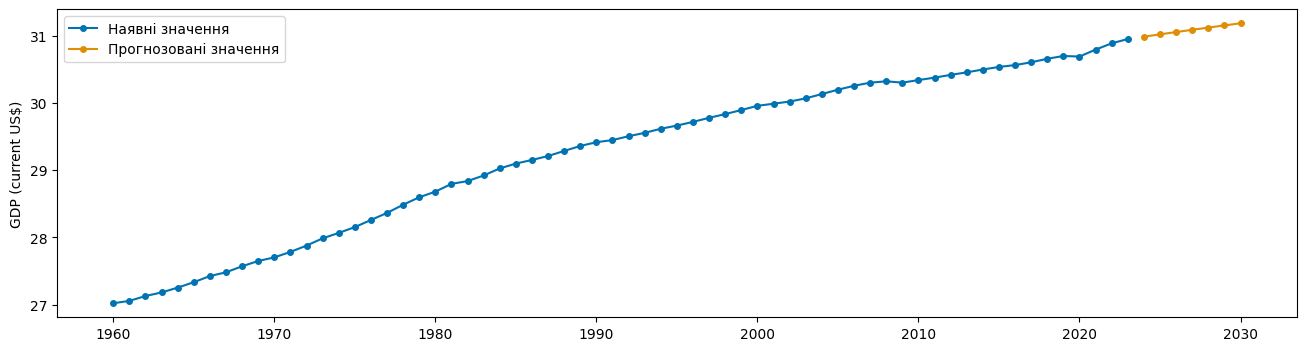

In [308]:
forecaster = BATS(use_trend=True)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["Наявні значення", "Прогнозовані значення"])

## TBATS

MAE: 0.054649648446875636
RMSE: 0.07317285606499996


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP (current US$)'>)

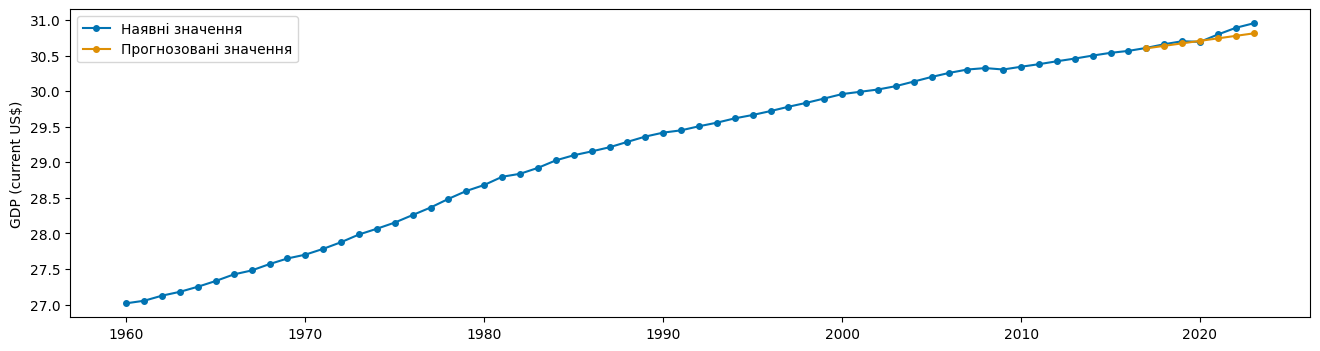

In [309]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(use_trend=True, use_box_cox=False)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh=np.arange(1, len(y_test) + 1))


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

plot_series(y, y_pred, labels=["Наявні значення", "Прогнозовані значення"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP (current US$)'>)

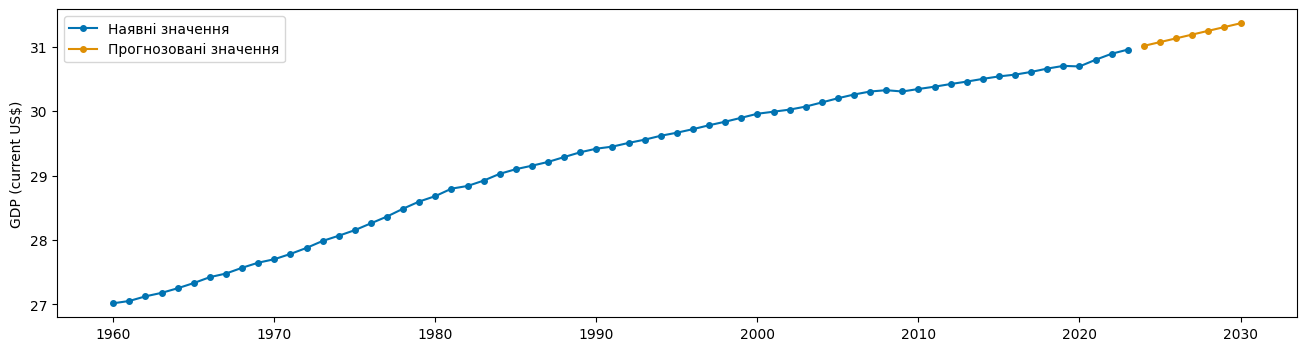

In [310]:
forecaster = TBATS(use_trend=True, use_box_cox=False)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["Наявні значення", "Прогнозовані значення"])